#DSC 672 Project by Vikram Kalister and Shreyas Ravi

## Importing Packages

In [1]:
import sklearn
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sklearn.__version__

'1.0.2'

In [2]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [4]:
data = pd.read_csv('cardio_train-1.csv', sep = ";")

In [5]:
data.shape

(70000, 13)

In [6]:
df = data.sample(frac=0.25)

In [7]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
56240,80240,20975,2,172,70.0,120,80,1,1,0,0,1,1
15501,22145,21154,1,160,69.0,150,100,1,1,0,0,0,1
68124,97295,20669,2,158,60.0,120,70,1,1,0,0,0,0
52518,74913,18146,1,160,68.0,100,90,2,1,0,0,1,0
34739,49621,21842,2,162,75.0,120,80,1,1,0,0,1,0


In [8]:
df.shape

(17500, 13)

In [9]:
df.info()
df["age"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17500 entries, 56240 to 66274
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           17500 non-null  int64  
 1   age          17500 non-null  int64  
 2   gender       17500 non-null  int64  
 3   height       17500 non-null  int64  
 4   weight       17500 non-null  float64
 5   ap_hi        17500 non-null  int64  
 6   ap_lo        17500 non-null  int64  
 7   cholesterol  17500 non-null  int64  
 8   gluc         17500 non-null  int64  
 9   smoke        17500 non-null  int64  
 10  alco         17500 non-null  int64  
 11  active       17500 non-null  int64  
 12  cardio       17500 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 1.9 MB


56240    20975
15501    21154
68124    20669
52518    18146
34739    21842
         ...  
56317    20981
1785     19719
56570    21235
18580    14581
66274    22736
Name: age, Length: 17500, dtype: int64

In [10]:
df["Age"] = df["age"]/365
del df["age"]
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age
56240,80240,2,172,70.0,120,80,1,1,0,0,1,1,57.465753
15501,22145,1,160,69.0,150,100,1,1,0,0,0,1,57.956164
68124,97295,2,158,60.0,120,70,1,1,0,0,0,0,56.627397
52518,74913,1,160,68.0,100,90,2,1,0,0,1,0,49.715068
34739,49621,2,162,75.0,120,80,1,1,0,0,1,0,59.841096


In [11]:
df['height'] = df['height']/100

In [12]:
df['height']

56240    1.72
15501    1.60
68124    1.58
52518    1.60
34739    1.62
         ... 
56317    1.59
1785     1.68
56570    1.61
18580    1.74
66274    1.78
Name: height, Length: 17500, dtype: float64

In [13]:
df['bmi'] = df['weight']/((df['height'])**2)

In [14]:
del df['weight']
del df['height']

In [15]:
df.head()

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,bmi
56240,80240,2,120,80,1,1,0,0,1,1,57.465753,23.661439
15501,22145,1,150,100,1,1,0,0,0,1,57.956164,26.953125
68124,97295,2,120,70,1,1,0,0,0,0,56.627397,24.034610
52518,74913,1,100,90,2,1,0,0,1,0,49.715068,26.562500
34739,49621,2,120,80,1,1,0,0,1,0,59.841096,28.577961


In [16]:
 df['bmi']

56240    23.661439
15501    26.953125
68124    24.034610
52518    26.562500
34739    28.577961
           ...    
56317    25.315454
1785     23.384354
56570    40.507696
18580    21.469150
66274    21.146320
Name: bmi, Length: 17500, dtype: float64

In [17]:
df["age"] = df["Age"].round()
del df["Age"]
del df['id']
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
56240,2,120,80,1,1,0,0,1,1,23.661439,57.0
15501,1,150,100,1,1,0,0,0,1,26.953125,58.0
68124,2,120,70,1,1,0,0,0,0,24.034610,57.0
52518,1,100,90,2,1,0,0,1,0,26.562500,50.0
34739,2,120,80,1,1,0,0,1,0,28.577961,60.0


In [18]:
df['bmi'] = df['bmi'].round()
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
56240,2,120,80,1,1,0,0,1,1,24.0,57.0
15501,1,150,100,1,1,0,0,0,1,27.0,58.0
68124,2,120,70,1,1,0,0,0,0,24.0,57.0
52518,1,100,90,2,1,0,0,1,0,27.0,50.0
34739,2,120,80,1,1,0,0,1,0,29.0,60.0


In [19]:
df = df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]]
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
56240,2,120,80,1,1,0,0,1,1,24.0,57.0
15501,1,150,100,1,1,0,0,0,1,27.0,58.0
68124,2,120,70,1,1,0,0,0,0,24.0,57.0
52518,1,100,90,2,1,0,0,1,0,27.0,50.0
34739,2,120,80,1,1,0,0,1,0,29.0,60.0


In [20]:
scaler = MinMaxScaler()

In [21]:
df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]] = scaler.fit_transform(df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]])

In [22]:
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
56240,1.0,0.016089,0.008,0.0,0.0,0.0,0.0,1.0,1.0,0.070946,0.692308
15501,0.0,0.017946,0.010,0.0,0.0,0.0,0.0,0.0,1.0,0.081081,0.730769
68124,1.0,0.016089,0.007,0.0,0.0,0.0,0.0,0.0,0.0,0.070946,0.692308
52518,0.0,0.014851,0.009,0.5,0.0,0.0,0.0,1.0,0.0,0.081081,0.423077
34739,1.0,0.016089,0.008,0.0,0.0,0.0,0.0,1.0,0.0,0.087838,0.807692


Text(0.5, 1.0, 'Correlation Plot')

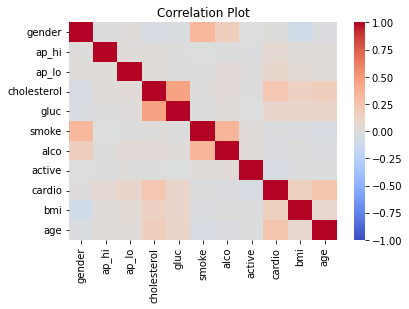

In [23]:
sns.heatmap(data = df.corr(), vmin = -1, vmax = 1, cmap = "coolwarm")
plt.title("Correlation Plot")

Text(0.5, 1.0, 'Presence of Heart Disease based on activity')

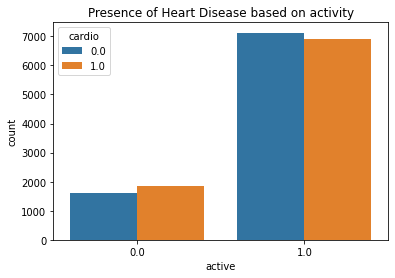

In [24]:
sns.countplot(x = "active", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on activity")

Text(0.5, 1.0, 'Presence of Heart Disease based on age')

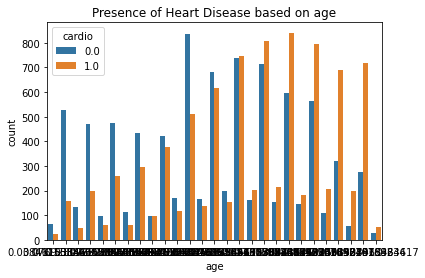

In [25]:
sns.countplot(x = "age", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on age")

Text(0.5, 1.0, 'Presence of Heart Disease based on cholesterol')

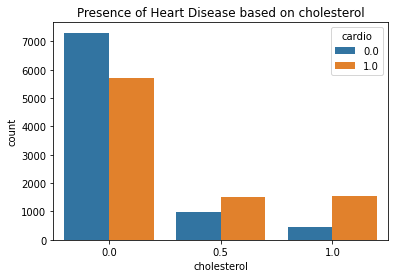

In [26]:
sns.countplot(x = "cholesterol", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on cholesterol")

In [27]:
X = df.drop("cardio", axis = 1)
y = df["cardio"]

## Multicolinearity & Feature Selection

In [28]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [134]:
"""""X = df[list(df.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)'"""""
#High VIF indicates that there's multicollinearity

,VIF,Column
9,8.182534,bmi
10,5.249362,age
7,4.278429,active
1,3.853932,ap_hi
8,2.275957,cardio
3,1.735275,cholesterol
0,1.704222,gender
4,1.469464,gluc
2,1.415529,ap_lo
5,1.374516,smoke


## Models Used
1. Decision Trees
2. Random Forest Classifier
3. Naive Bayes
4. Support Vector Machines (SVM)
5. Support Vector Machines (PCA)
6. Bayesian Analysis

## Preparing Data for Machine Learning

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

### SMOTE

In [31]:
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (17500, 10)
Shape of X after SMOTE: (17528, 10)


In [32]:
rf = RandomForestClassifier()

In [33]:
rf.fit(X_sm, y_sm)

RandomForestClassifier()

In [34]:
predrfc = rf.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = predrfc)

0.9163809523809524

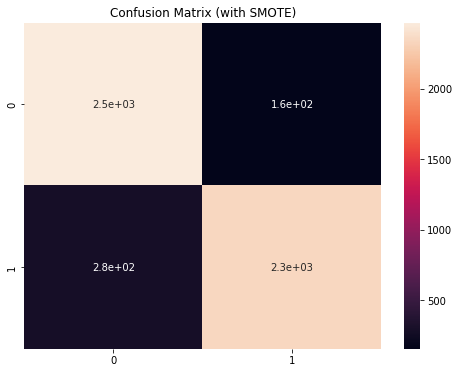

In [35]:
cm = confusion_matrix(y_test, predrfc)
plt.figure(figsize = (8, 6))
plt.title('Confusion Matrix (with SMOTE)')
sns.heatmap(cm, annot = True, cmap = 'rocket');

## Decision Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [37]:
dt = DecisionTreeClassifier()

In [38]:
dt.fit(X_sm, y_sm)

DecisionTreeClassifier()

In [39]:
pred_train = dt.predict(X_sm)

In [40]:
print("Accuracy Train", metrics.accuracy_score(y_sm, pred_train))

Accuracy Train 0.9164764947512551


In [41]:
pred = dt.predict(X_test)

In [42]:
print("Accuracy Test", metrics.accuracy_score(y_test, pred))

Accuracy Test 0.9188571428571428


In [43]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      2623
         1.0       0.97      0.86      0.91      2627

    accuracy                           0.92      5250
   macro avg       0.92      0.92      0.92      5250
weighted avg       0.92      0.92      0.92      5250



### Grid Search for Decision Trees

In [44]:
parameters = {
    "criterion": ['gini', 'entropy'], 
    "max_depth": [10, 50, 100, 200], 
    "min_samples_split": range(2, 12),
    "min_samples_leaf": range(1, 5)
}

In [45]:
grid_dt = GridSearchCV(dt, parameters, cv = 3, n_jobs = -1)

In [48]:
grid_dt.fit(X_sm, y_sm)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100, 200],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 12)})

In [49]:
grid_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       min_samples_split=4)

In [50]:
dtcv = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=9)

In [51]:
dtcv.fit(X_sm, y_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=9)

In [52]:
dtcv_pred = dtcv.predict(X_test)

In [53]:
print(confusion_matrix(y_test, dtcv_pred))

[[2082  541]
 [ 722 1905]]


In [54]:
print(metrics.classification_report(y_test, dtcv_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.79      0.77      2623
         1.0       0.78      0.73      0.75      2627

    accuracy                           0.76      5250
   macro avg       0.76      0.76      0.76      5250
weighted avg       0.76      0.76      0.76      5250



## Random Forest Classifier

In [55]:
RF = RandomForestClassifier()

In [56]:
RF.fit(X_sm, y_sm)

RandomForestClassifier()

In [57]:
pred = RF.predict(X_sm)
metrics.accuracy_score(y_true = y_sm, y_pred = pred)

0.9164764947512551

In [58]:
pred_test = RF.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred_test)

0.916

In [59]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      2623
         1.0       0.93      0.89      0.91      2627

    accuracy                           0.92      5250
   macro avg       0.92      0.92      0.92      5250
weighted avg       0.92      0.92      0.92      5250



### Grid Search for Random Forest Classifier

In [60]:
parameters = {
    "min_samples_split": [100, 500, 1000, 2000], 
    "max_depth": [10, 50, 100, 200], 
    "n_estimators": [100, 500, 1000]
}

In [61]:
grid = GridSearchCV(RF, parameters, cv = 3, n_jobs = -1)

In [62]:
grid.fit(X_sm, y_sm)

KeyboardInterrupt: ignored

In [ ]:
grid.best_estimator_

In [ ]:
rf = RandomForestClassifier(max_depth=10, min_samples_split=100)

In [ ]:
rf.fit(X_sm, y_sm)

In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, rf_pred))

In [ ]:
print(metrics.classification_report(y_test, rf_pred))

Shows an accuracy of 0.73 and precision of 0.75 and recall of 0.66

## Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
g = GaussianNB()

In [65]:
g.fit(X_sm, y_sm)

GaussianNB()

In [66]:
pred = g.predict(X_sm)
metrics.accuracy_score(y_sm, pred)

0.5834664536741214

In [67]:
pred = g.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.584952380952381

In [68]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.55      0.93      0.69      2623
         1.0       0.78      0.24      0.37      2627

    accuracy                           0.58      5250
   macro avg       0.66      0.59      0.53      5250
weighted avg       0.66      0.58      0.53      5250



### Grid Search for Naive Bayes

In [69]:
from sklearn.metrics import classification_report

In [70]:
parameters = {
    "priors": [None],
    "var_smoothing": np.logspace(0,-9, num = 100)
}

In [71]:
grid = GridSearchCV(g, parameters, cv = 3, n_jobs = -1)

In [72]:
grid.fit(X_sm, y_sm)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None],
                         'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.511191...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [73]:
grid.best_estimator_

GaussianNB(var_smoothing=0.01)

In [74]:
GNB = GaussianNB(var_smoothing=0.657933224657568)

In [75]:
GNBNew_pred = g.predict(X_test)

In [76]:
print(confusion_matrix(y_test, GNBNew_pred))

[[2442  181]
 [1998  629]]


In [77]:
print(classification_report(y_test, GNBNew_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.93      0.69      2623
         1.0       0.78      0.24      0.37      2627

    accuracy                           0.58      5250
   macro avg       0.66      0.59      0.53      5250
weighted avg       0.66      0.58      0.53      5250



## Support Vector Machines

In [78]:
from sklearn.svm import SVC

In [79]:
estimator = SVC(kernel ='rbf')

In [80]:
estimator.fit(X_sm, y_sm)

SVC()

In [81]:
pred = estimator.predict(X_sm)

In [82]:
svm = metrics.accuracy_score(y_sm, pred)

In [83]:
svm_pred2 = estimator.predict(X_test)

In [84]:
svm1 = metrics.accuracy_score(y_test,svm_pred2)

In [85]:
print("Training Accuracy: " + str(svm))
print("Testing Accuracy: " + str(svm1))

Training Accuracy: 0.6356686444545869
Testing Accuracy: 0.6333333333333333


In [86]:
print(metrics.classification_report(y_test, svm_pred2))

              precision    recall  f1-score   support

         0.0       0.62      0.68      0.65      2623
         1.0       0.65      0.59      0.62      2627

    accuracy                           0.63      5250
   macro avg       0.63      0.63      0.63      5250
weighted avg       0.63      0.63      0.63      5250



### Grid Search for Support Vector Machines

In [104]:
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100, 1000]
}

In [105]:
cv_1 = GridSearchCV(estimator, parameters, cv=3, n_jobs=-1)

In [106]:
cv_1.fit(X_sm, y_sm)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']})

In [107]:
cv_1.best_estimator_

SVC(C=1000, kernel='linear')

In [108]:
svc = SVC(C=1000, kernel='linear')

In [109]:
svc.fit(X_sm, y_sm)

SVC(C=1000, kernel='linear')

In [110]:
svc_pred = svc.predict(X_test)

In [111]:
print(confusion_matrix(y_test, svc_pred))

[[2113  510]
 [ 952 1675]]


In [112]:
print(metrics.classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.81      0.74      2623
         1.0       0.77      0.64      0.70      2627

    accuracy                           0.72      5250
   macro avg       0.73      0.72      0.72      5250
weighted avg       0.73      0.72      0.72      5250



## Support Vector Machines (PCA)



In [113]:
from sklearn.decomposition import PCA

In [114]:
pca = PCA(n_components=None)

pca.fit(X_sm)
X_train_pca = pca.transform(X_sm)
X_test_pca = pca.transform(X_test)

[0.31262016 0.51464478 0.7046026  0.80396142 0.88558375 0.95041459
 0.99901163 0.99961146 0.99989393 1.        ]


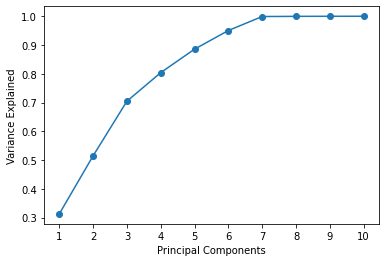

In [115]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [116]:
X_train_pca2 = X_train_pca[:, 0:11]
X_test_pca2 = X_test_pca[:, 0:11]

In [117]:
from sklearn.svm import SVC

In [118]:
estimator_svc = SVC(kernel ='rbf')

In [119]:
estimator_svc.fit(X_train_pca,y_sm)

SVC()

In [120]:
pred = estimator_svc.predict(X_train_pca)

In [121]:
svm = metrics.accuracy_score(y_sm,pred)

In [122]:
pred2 = estimator_svc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [123]:
svm1 = metrics.accuracy_score(y_test,pred2)

In [124]:
print("Training Accuracy: " + str(svm))
print("Testing Accuracy: " + str(svm1))

Training Accuracy: 0.638407120036513
Testing Accuracy: 0.49638095238095237


In [125]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.40      0.02      0.03      2623
         1.0       0.50      0.98      0.66      2627

    accuracy                           0.50      5250
   macro avg       0.45      0.50      0.35      5250
weighted avg       0.45      0.50      0.35      5250



### Grid Search for SVM (PCA)

In [126]:
param_pca = {'C': [1,10,100,1000],
              'gamma': [0.001,0.0001,1]}

In [127]:
gs = GridSearchCV(estimator = estimator_svc, param_grid = 
param_pca, cv = 5, n_jobs = -1)

In [128]:
gs.fit(X_train_pca2, y_sm)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001, 1]})

In [129]:
gs.best_estimator_

SVC(C=1000, gamma=1)

In [130]:
pca_new =SVC(C = 1000, gamma = 1)

In [131]:
pca_new.fit(X_train_pca2 ,y_sm)

SVC(C=1000, gamma=1)

In [132]:
pca_new1 = pca_new.predict(X_test_pca2)

In [133]:
print(metrics.classification_report(y_test, pca_new1))

              precision    recall  f1-score   support

         0.0       0.71      0.76      0.73      2623
         1.0       0.74      0.69      0.71      2627

    accuracy                           0.72      5250
   macro avg       0.72      0.72      0.72      5250
weighted avg       0.72      0.72      0.72      5250



## AdaBoost Classifier ##

In [87]:
from sklearn.ensemble import AdaBoostClassifier

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
AdaBoostClassifier()

AdaBoostClassifier()

In [90]:
abc = AdaBoostClassifier()
abc.fit(X_sm, y_sm)

AdaBoostClassifier()

In [91]:
abc_pred_train = abc.predict(X_sm)
accuracy_score(y_sm, y_pred=abc_pred_train) #training accuracy

0.7348813327247832

In [92]:
abc_pred_test = abc.predict(X_test)
accuracy_score(y_test, y_pred=abc_pred_test) #testing accuracy

0.7340952380952381

In [93]:
cm_abc = confusion_matrix(y_test, abc_pred_test)
print(cm_abc)

[[2092  531]
 [ 865 1762]]


In [94]:
print(metrics.classification_report(y_true = y_test, y_pred = abc_pred_test, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      2623
           1       0.77      0.67      0.72      2627

    accuracy                           0.73      5250
   macro avg       0.74      0.73      0.73      5250
weighted avg       0.74      0.73      0.73      5250



### Grid Search for AdaBoost

In [95]:
parameters = {
    'learning_rate': [2, 4, 6, 8, 10, 12, 14, 16],
    'n_estimators': [50, 60, 70, 80, 90]
}

In [96]:
ab_gs = GridSearchCV(abc, parameters, cv=3, n_jobs=-1)

In [97]:
ab_gs.fit(X_sm, y_sm)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [2, 4, 6, 8, 10, 12, 14, 16],
                         'n_estimators': [50, 60, 70, 80, 90]})

In [98]:
ab_gs.best_estimator_

AdaBoostClassifier(learning_rate=2, n_estimators=60)

In [99]:
ab_1 = AdaBoostClassifier(learning_rate=6)

In [100]:
ab_1.fit(X_sm, y_sm)

AdaBoostClassifier(learning_rate=6)

In [101]:
ab_1_pred = ab_1.predict(X_test)

In [102]:
print(confusion_matrix(y_test, ab_1_pred))

[[ 495 2128]
 [1621 1006]]


In [103]:
print(metrics.classification_report(y_test, ab_1_pred))

              precision    recall  f1-score   support

         0.0       0.23      0.19      0.21      2623
         1.0       0.32      0.38      0.35      2627

    accuracy                           0.29      5250
   macro avg       0.28      0.29      0.28      5250
weighted avg       0.28      0.29      0.28      5250



## Final Data Visualizations